# Data Visualization: GoBike dataset 2017

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
%matplotlib inline

## Wrangling

In [2]:
df_original = pd.read_csv('dataset.csv')
df = df_original.copy()
df.head()

# reading the dataset and making copy of it.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.shape

# rows and columns

(519700, 13)

In [4]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

In [5]:
df.describe()

# getting data statistics

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [6]:
df.info()

# basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.isnull().sum()

# checking for null values

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [8]:
df.start_station_name.value_counts()

# names of stations in counts

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])

# Convert time variables from string to datetime

In [10]:
df['month'] = pd.DatetimeIndex(df['start_time']).month

In [11]:
df.month.value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: month, dtype: int64

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,12


In [13]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df.month.value_counts()

Oct    108937
Sep     98558
Nov     95612
Dec     86539
Aug     83292
Jul     44073
Jun      2689
Name: month, dtype: int64

In [15]:
# Day of the week
df['start_weekday_num'] = df['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_weekday_char'] = df['start_weekday_num'].map(dmap)
df['start_weekday_char'].value_counts()

Tue    87865
Wed    87752
Thu    85243
Mon    81410
Fri    81165
Sat    50874
Sun    45391
Name: start_weekday_char, dtype: int64

In [16]:
df.start_station_latitude.value_counts()

37.795392    15187
37.804770    13664
37.776598    12546
37.776639    12055
37.776619    11960
             ...  
37.327581       11
37.849735        6
37.344882        5
37.800002        2
37.857490        1
Name: start_station_latitude, Length: 272, dtype: int64

In [17]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [18]:
df.duration_sec.mean()

1099.0095208774294

## Univariate Exploration

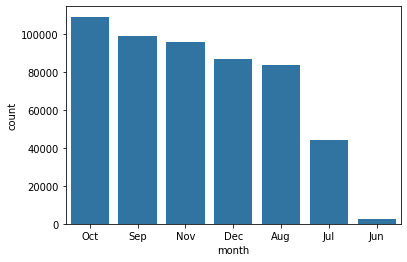

In [19]:
base_color = sb.color_palette()[0]
month_order = df['month'].value_counts().index
sb.countplot(data = df, x = 'month', color = base_color, order = month_order)

# getting the month data in bar chart

#### 1. June has lowest value because the system was launched by june end only.

(-1.119909674213791,
 1.1202249793319414,
 -1.1207133744677753,
 1.1194212790779572)

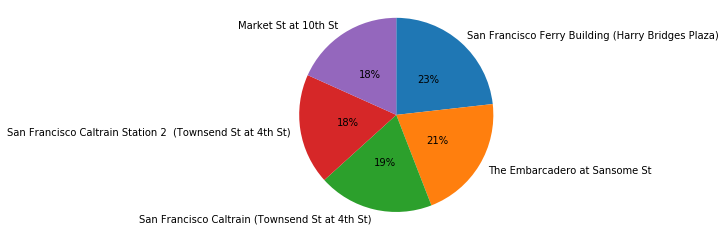

In [20]:
sorted_counts = df['start_station_name'].value_counts()[:5]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1);
plt.axis('square')

# getting top 5 places used to start journey in a pie chart

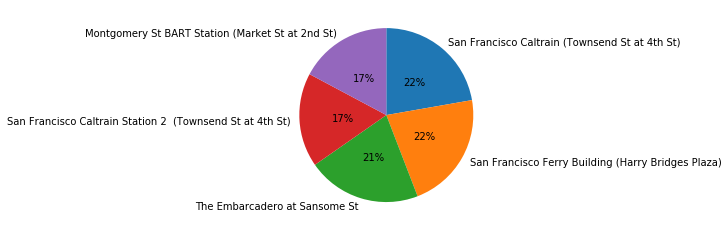

In [21]:
sorted_counts = df['end_station_name'].value_counts()[:5]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1);

# getting top 5 places used to end journey in a pie chart

#### 2.San Francisco Ferry is the most started location and San Franscisco Caltrain is most ended location.

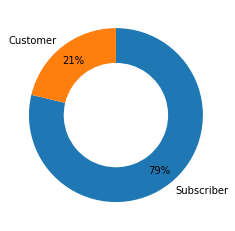

In [22]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},autopct='%1.0f%%',pctdistance=0.8, labeldistance=1.1);

# donut plot to get the subscribers and customers percentage

#### 3.We have most of type of users using the system to be subscribers 

In [23]:
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'

# time division with day status

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df.start_hour.value_counts()

17    60111
8     57227
18    46088
9     45457
16    41339
15    28448
12    27448
13    27374
7     26800
19    26598
10    25217
14    24900
11    24303
20    16642
21    11993
6      8895
22     7967
23     4867
0      2606
5      2145
1      1377
2       860
4       640
3       398
Name: start_hour, dtype: int64

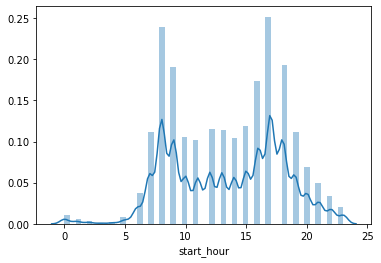

In [25]:
sb.distplot(df['start_hour'])

#### 4.We can see that most time of biking of users are during 8 am and 5 pm

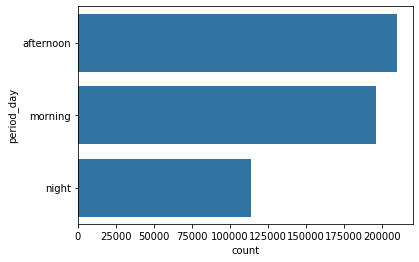

In [26]:
base_color = sb.color_palette()[0]
order = df['period_day'].value_counts().index
sb.countplot(data = df, y = 'period_day', color = base_color, order = order)

#### 5.Highest number of users biked during afternoons followed by morning and low number of users biken during night.

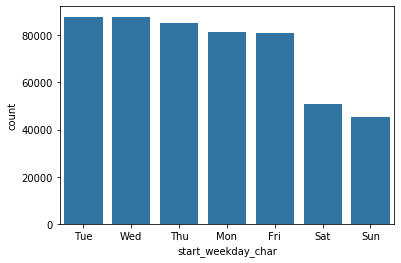

In [27]:
base_color = sb.color_palette()[0]
order = df['start_weekday_char'].value_counts().index
sb.countplot(data = df, x = 'start_weekday_char', color = base_color, order = order)


#### 6.We have the most number of bikers on Tuesday and least on Sunday

## Bivariate Exploration

In [28]:
df['duration_hr'] = df['duration_sec']/3600

In [29]:
df.duration_hr.head()

0    22.252778
1    21.888889
2    12.713333
3    17.270000
4    12.111944
Name: duration_hr, dtype: float64

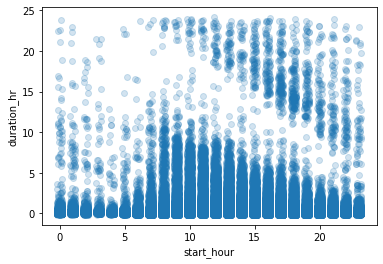

In [30]:
sb.regplot(data = df, x = 'start_hour', y = 'duration_hr', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})

#### 1.We can see that the users who started in morning time like 8-9 am have used the bike most number of hours.

In [31]:
df['month_value'] = pd.DatetimeIndex(df['start_time']).month

In [32]:
df['user'] = df['user_type']

In [33]:
df.user

0           Customer
1           Customer
2           Customer
3           Customer
4         Subscriber
             ...    
519695    Subscriber
519696    Subscriber
519697    Subscriber
519698    Subscriber
519699    Subscriber
Name: user, Length: 519700, dtype: object

In [34]:
df['user'].replace( 'Customer',0,inplace=True)
df['user'].replace( 'Subscriber',1,inplace=True)

In [35]:
df.user

0         0
1         0
2         0
3         0
4         1
         ..
519695    1
519696    1
519697    1
519698    1
519699    1
Name: user, Length: 519700, dtype: int64

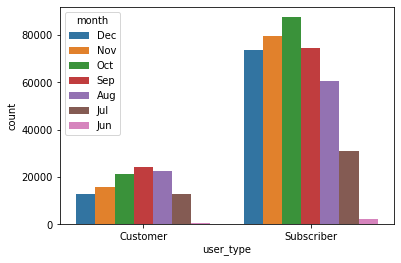

In [36]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', hue = 'month')

#### 2.For Customer, September seems to be highest biked month while for a subscriber it was October

In [37]:
df.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'month', 'start_weekday_num', 'start_weekday_char', 'start_hour',
       'period_day', 'duration_hr', 'month_value', 'user'],
      dtype='object')

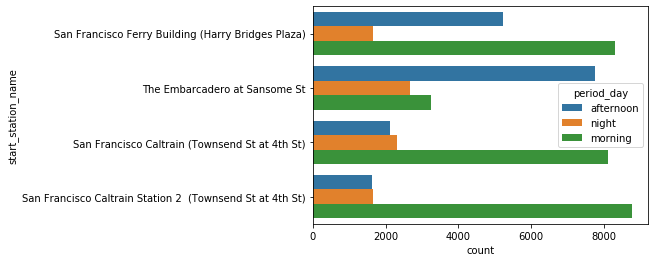

In [38]:
sb.countplot(data = df, y = 'start_station_name', hue = 'period_day', order=df.start_station_name.value_counts().iloc[:4].index)

#### 3.In the top 4 stations we can see more people started to bike in the morning.

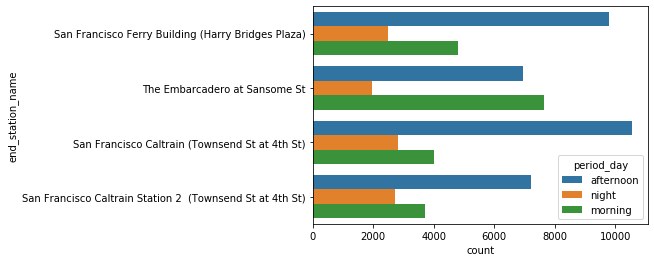

In [39]:
sb.countplot(data = df, y = 'end_station_name', hue = 'period_day', order=df.start_station_name.value_counts().iloc[:4].index)

#### 4.In the top 4 stations we can see more people ended the biking by afternoon.

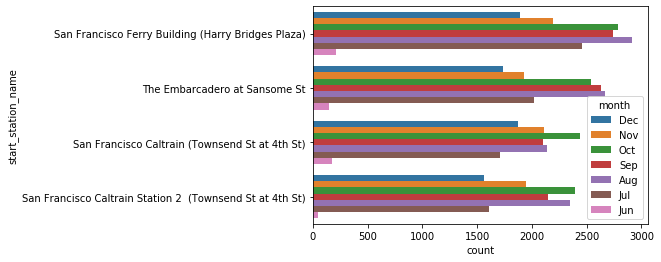

In [40]:
sb.countplot(data = df, y = 'start_station_name', hue = 'month', order=df.start_station_name.value_counts().iloc[:4].index)

#### 5.In the top 2 places most biking activity happend in August while in 3rd and 4rth place most activity occured in october

In [41]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'month', 'start_weekday_num', 'start_weekday_char', 'start_hour',
       'period_day', 'duration_hr', 'month_value', 'user'],
      dtype='object')

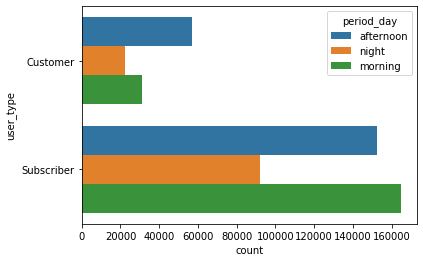

In [48]:
sb.countplot(data = df, y = 'user_type', hue = 'period_day')

#### 6.Subscribers bike more in the morning and customers bike more in the afternoon

In [47]:
df.start_hour.median()

14.0

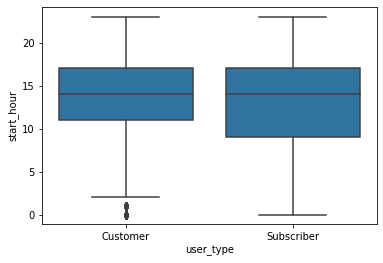

In [49]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'start_hour', color = base_color)

#### 7.Customer data has some outliers. Subsciber data has more values of starting time below the median region that is around 2pm. So we can say more subscribers prefer using bike during morning hours .

## Multivariate Exploration

In [50]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'month', 'start_weekday_num', 'start_weekday_char', 'start_hour',
       'period_day', 'duration_hr', 'month_value', 'user'],
      dtype='object')

In [54]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,start_weekday_num,start_hour,duration_hr,month_value,user
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,2.637048,13.461037,0.305280,9.731716,0.787435
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,1.859312,4.615019,0.956707,1.566787,0.409123
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,0.000000,0.000000,0.016944,6.000000,0.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1.000000,9.000000,0.106111,8.000000,1.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,3.000000,14.000000,0.165556,10.000000,1.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,4.000000,17.000000,0.260556,11.000000,1.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,6.000000,23.000000,23.991389,12.000000,1.000000


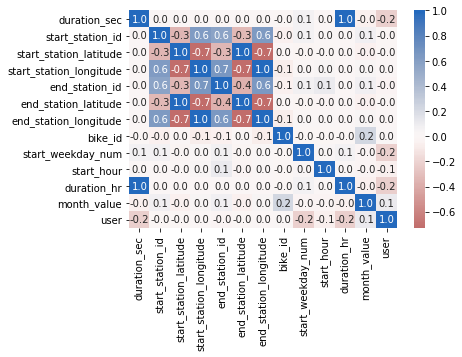

In [57]:
sb.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'vlag_r', center = 0)